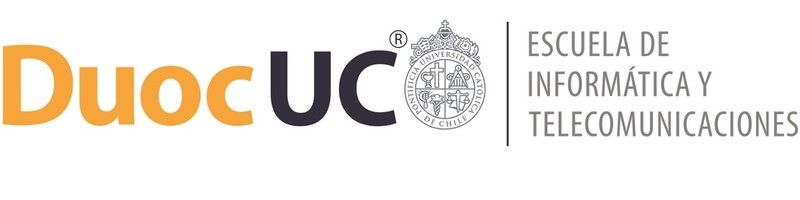

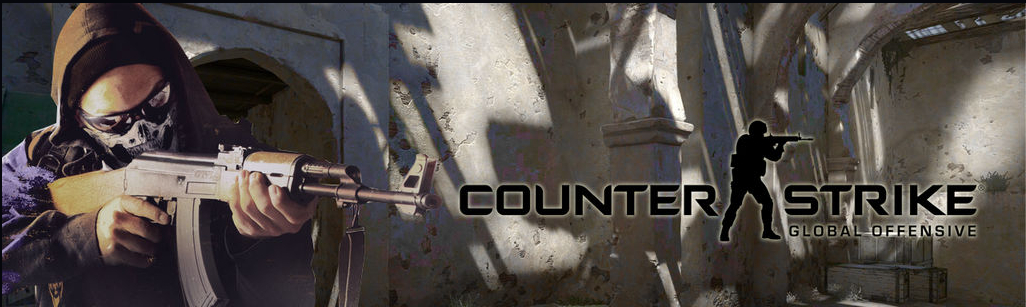

# Informe Técnico - Caso Counter Strike


Integrantes:
+ Paloma Tamayo
+ Angelina Mendoza
+ Catalina Núñez

Docente: GIOCRISRAI GODOY   

Sección: MLY0100 -




# 1. Entendimiento del Negocio

**Contexto del Negocio:**  
El uso de datos en el ámbito de los videojuegos es fundamental para mejorar la experiencia de usuario, optimizar la dinámica de juego, personalizar estrategias y realizar predicciones de comportamiento de jugadores. Aplicando Machine Learning, se pueden identificar patrones y tendencias que potencian la competitividad y la retención de usuarios.

**Importancia de Machine Learning en Videojuegos:**  
Machine Learning permite:
- Predecir comportamientos de los jugadores.
- Balancear partidas de manera dinámica.
- Detectar anomalías o conductas sospechosas (por ejemplo, trampas).
- Optimizar la duración de las partidas según características del jugador.

**Relevancia del Dataset:**  
El dataset proporcionado, que contiene datos de partidas (kills, headshots, sobrevivencia, equipamiento inicial, etc.), es altamente relevante para construir modelos predictivos.  
Sin embargo, se podría mejorar incluyendo:
- Nivel de habilidad de los jugadores.
- Estadísticas históricas de partidas anteriores.
- Condiciones de red (ping, latencia).

## 🎯 Objetivos de Negocio

Objetivo de Clasificación:
Predecir si un jugador sobrevivirá una partida (Survived), basado en variables como kills, headshots, equipamiento y distancia recorrida.

Hipótesis 1 (Objetivo de Clasificación - Supervivencia): "Los jugadores que adoptan un estilo de juego más estático y defensivo (recorren menos distancia) y tienen mejor equipamiento inicial tienen mayor probabilidad de sobrevivir en una partida, independientemente de su número de eliminaciones."

Objetivo de Regresión:
Predecir la distancia recorrida por un jugador en una partida (TravelledDistance), utilizando como variables predictoras las armas principales, kills, headshots y tiempo de vida.

Hipótesis 2 (Objetivo de Regresión - Distancia Recorrida): "Los jugadores que utilizan rifles de asalto como arma principal tienden a recorrer menos distancia durante una partida que aquellos que utilizan otro tipo de armas."


# 📑 Contenido del Análisis

1. **Carga y descripción general del dataset**
2. **Identificación de tipos de variables**
3. **Medidas de tendencia central y dispersión**
4. **Análisis de valores nulos**
5. **Análisis gráfico:**
   - Histogramas de variables numéricas
   - Boxplots para detección de outliers
   - Distribución de variables categóricas
   - Matriz de correlación entre variables
6. **Análisis propio basado en el caso de estudio:**
   - Supervivencia promedio por equipo
   - Análisis de valor de equipamiento inicial por equipo
   - Relación kills vs headshots según supervivencia
   - Probabilidad de supervivencia según número de kills
7. **Preparación y transformación de los datos:**
   - Tratamiento de valores faltantes
   - Detección y tratamiento de outliers
   - Escalado de variables numéricas
   - Codificación de variables categóricas
   - Selección de características relevantes
8. **Conclusiones finales del análisis**


## Cargar librerías y Dataset

In [ ]:

#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
#CARGAR ARCHIVO DE DATOS, SUBIR ARCHIVO LOCAL
from google.colab import files
uploaded = files.upload()

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


In [ ]:
# CARGAR DATOS EN UN DATAFRAME
import pandas as pd

# Probar separador punto y coma
df = pd.read_csv('Anexo ET_demo_round_traces_2022.csv', sep=';')

# Mostrar las primeras filas para verificar
df.head()

<ipython-input-3-2deb9c6be51f>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces_2022.csv', sep=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


## Información General del Dataset

In [ ]:
# Muestra la estructura del dataset: número de filas, columnas, tipos de datos y valores no nulos.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

## Medidas de Tendencia Central

In [ ]:

# Estadísticas descriptivas
display(df.describe(include='all'))

# Medias, medianas y modas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numericas:
    print(f"\nTendencia central de {col}:")
    print(f"Media: {df[col].mean():.2f}, Mediana: {df[col].median():.2f}, Moda: {df[col].mode()[0]:.2f}")


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157,79155,79157.000000,79157.000000,79157.000000,79157,79156,79157,79157,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
unique,NaN,4,2,NaN,NaN,NaN,5,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,de_inferno,Terrorist,NaN,NaN,NaN,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,28869,39591,NaN,NaN,NaN,23195,42017,47214,79157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,60570.193640,NaN,NaN,1.500006,250.525033,12.765517,NaN,NaN,NaN,NaN,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,NaN,NaN,0.500003,149.557804,7.432837,NaN,NaN,NaN,NaN,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,NaN,NaN,1.000000,4.000000,1.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,NaN,NaN,1.000000,128.000000,6.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,NaN,NaN,2.000000,236.000000,12.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,NaN,NaN,2.000000,373.000000,19.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000



Tendencia central de Unnamed: 0:
Media: 60570.19, Mediana: 56720.00, Moda: 600.00

Tendencia central de InternalTeamId:
Media: 1.50, Mediana: 2.00, Moda: 2.00

Tendencia central de MatchId:
Media: 250.53, Mediana: 236.00, Moda: 29.00

Tendencia central de RoundId:
Media: 12.77, Mediana: 12.00, Moda: 1.00

Tendencia central de RLethalGrenadesThrown:
Media: 0.50, Mediana: 0.00, Moda: 0.00

Tendencia central de RNonLethalGrenadesThrown:
Media: 1.26, Mediana: 1.00, Moda: 0.00

Tendencia central de PrimaryAssaultRifle:
Media: 0.68, Mediana: 1.00, Moda: 1.00

Tendencia central de PrimarySniperRifle:
Media: 0.09, Mediana: 0.00, Moda: 0.00

Tendencia central de PrimaryHeavy:
Media: 0.01, Mediana: 0.00, Moda: 0.00

Tendencia central de PrimarySMG:
Media: 0.01, Mediana: 0.00, Moda: 0.00

Tendencia central de PrimaryPistol:
Media: 0.22, Mediana: 0.00, Moda: 0.00

Tendencia central de RoundKills:
Media: 0.67, Mediana: 0.00, Moda: 0.00

Tendencia central de RoundAssists:
Media: 0.15, Mediana: 0.00

## Medidas de Dispersión

In [ ]:
# Medidas de Dispersión
print("Desviación estándar de las variables numéricas:")
print(df[numericas].std())

print("\nVarianza de las variables numéricas:")
print(df[numericas].var())


Desviación estándar de las variables numéricas:
MatchKills                     6.195079e+00
MatchHeadshots                 3.246752e+00
RoundKills                     8.817980e-01
RoundAssists                   3.856013e-01
RoundFlankKills                3.206406e-01
RoundStartingEquipmentValue    2.111285e+03
TeamStartingEquipmentValue     9.743203e+03
PrimaryAssaultRifle            4.641251e-01
PrimarySMG                     8.245257e-02
TravelledDistance              1.286530e+16
dtype: float64

Varianza de las variables numéricas:
MatchKills                     3.837901e+01
MatchHeadshots                 1.054140e+01
RoundKills                     7.775678e-01
RoundAssists                   1.486884e-01
RoundFlankKills                1.028104e-01
RoundStartingEquipmentValue    4.457526e+06
TeamStartingEquipmentValue     9.493001e+07
PrimaryAssaultRifle            2.154121e-01
PrimarySMG                     6.798427e-03
TravelledDistance              1.655160e+32
dtype: float64



**Interpretación de la Dispersión:**

- Las variables como `MatchKills` y `RoundKills` presentan una alta desviación estándar, lo que indica que hay alta variabilidad entre los jugadores en cuanto a las eliminaciones logradas.
- Por otro lado, variables como `Survived` tienen baja desviación estándar, lo que sugiere que la mayoría de los equipos tienen tasas de supervivencia similares.
- Una alta dispersión implica que los resultados varían mucho entre las partidas, lo que puede afectar la capacidad predictiva de los modelos de clasificación.



## Análisis de Distribuciones

In [ ]:
#distribución
from scipy.stats import shapiro
stat, p = shapiro(df['MatchKills'])
print('p-valor:', p)


p-valor: 3.225627993453145e-90


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79157.
  res = hypotest_fun_out(*samples, **kwds)


Comentarios

Para verificar si las variables numéricas siguen una distribución normal, se aplicó el test de normalidad de Shapiro-Wilk sobre la variable MatchKills.

Dado que el p-valor obtenido es mucho menor a 0.05, rechazamos la hipótesis nula de normalidad. Esto indica que los datos de MatchKills no siguen una distribución normal.

Se recibió una advertencia debido al gran tamaño de la muestra (N = 79.157 registros), lo cual puede afectar la precisión del p-valor. Sin embargo, el valor extremadamente bajo confirma que la distribución no es normal.

Esta observación es importante para decidir futuros métodos de modelamiento, ya que muchos algoritmos estadísticos tradicionales asumen normalidad en los datos.

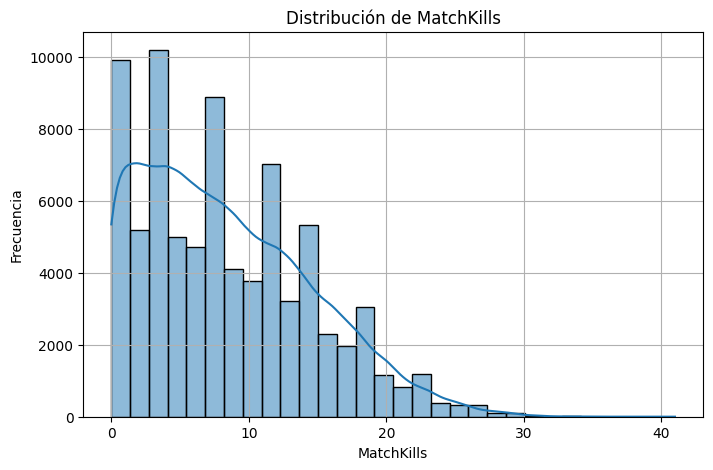

In [ ]:
#gráfico
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histograma
plt.figure(figsize=(8,5))
sns.histplot(df['MatchKills'], kde=True, bins=30)  # Histograma + curva KDE
plt.title('Distribución de MatchKills')
plt.xlabel('MatchKills')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


## Análisis de Valores Nulos

In [ ]:
# Muestra el número de valores nulos por columna, ordenados de mayor a menor.
df.isnull().sum().sort_values(ascending=False)


,0
Team,2
MatchWinner,1
Map,0
InternalTeamId,0
MatchId,0
Unnamed: 0,0
RoundId,0
RoundWinner,0
Survived,0
AbnormalMatch,0


## Identificación de Variables Numéricas y Categóricas

In [ ]:

# Selecciona los nombres de columnas de tipo numérico y los guarda en una lista.
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Selecciona los nombres de columnas de tipo categórico (texto) y los guarda en una lista.
categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Imprime las listas de variables numéricas y categóricas encontradas.
print('Variables numéricas:', numericas)
print('Variables categóricas:', categoricas)



Variables numéricas: ['Unnamed: 0', 'InternalTeamId', 'MatchId', 'RoundId', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']
Variables categóricas: ['Map', 'Team', 'RoundWinner', 'MatchWinner', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']


## Distribución de Variables Numéricas (Histogramas)

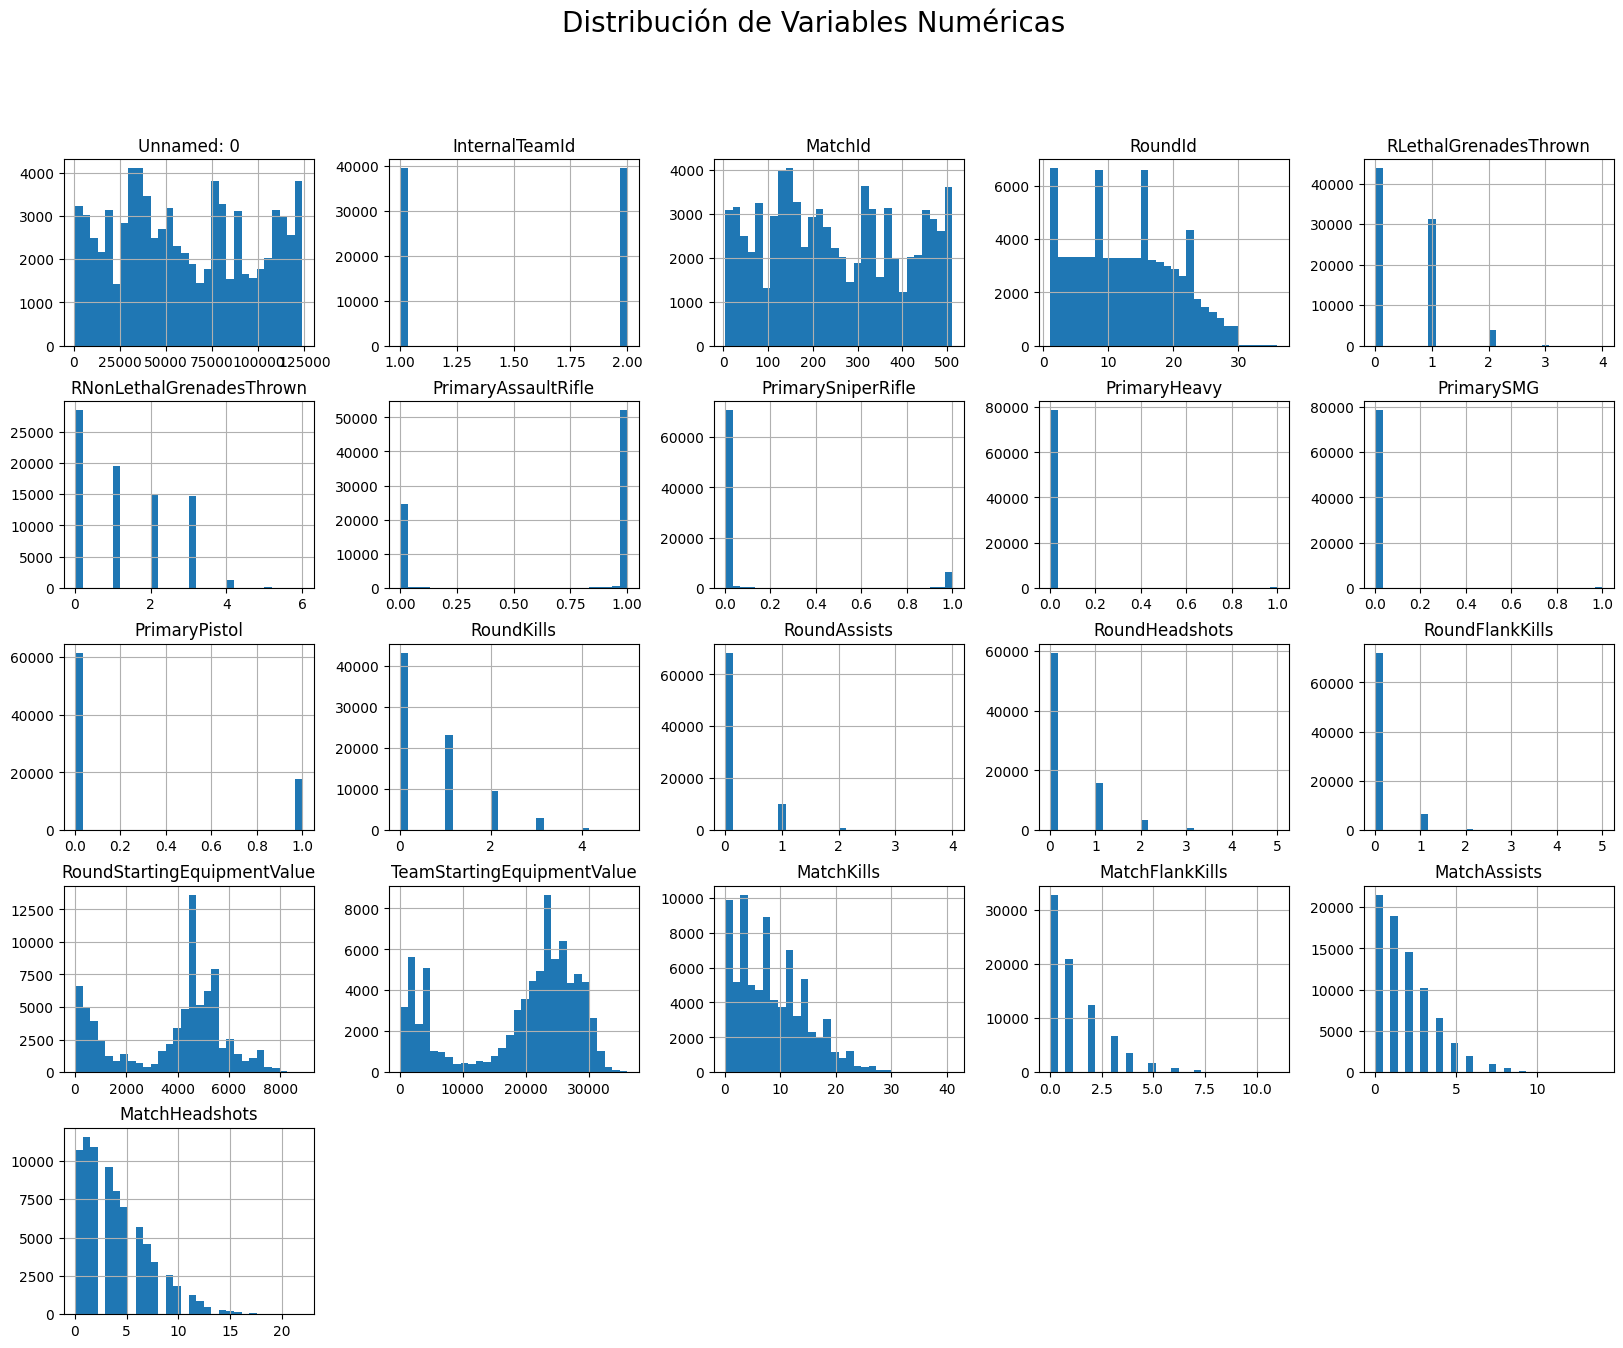

In [ ]:
# Genera histogramas para visualizar la distribución de todas las variables numéricas.
df[numericas].hist(bins=30, figsize=(20,15))

# Agrega un título general a todos los histogramas.
plt.suptitle('Distribución de Variables Numéricas', fontsize=20)

# Muestra los gráficos generados.
plt.show()


## Detección de Outliers (Boxplots)

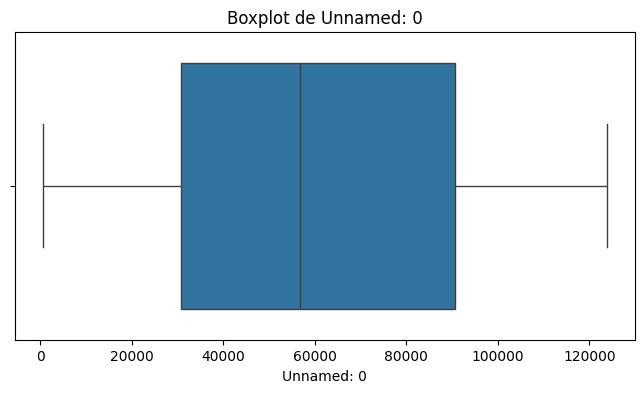

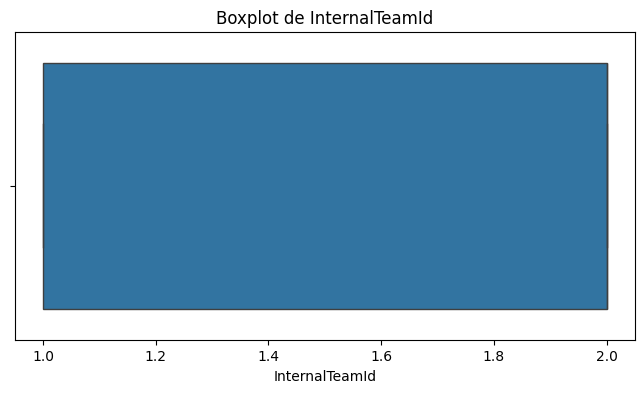

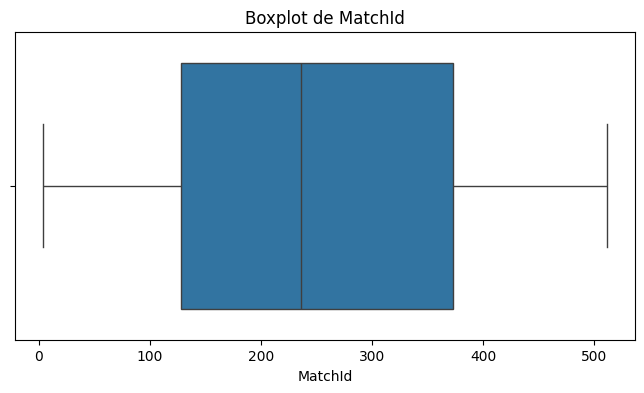

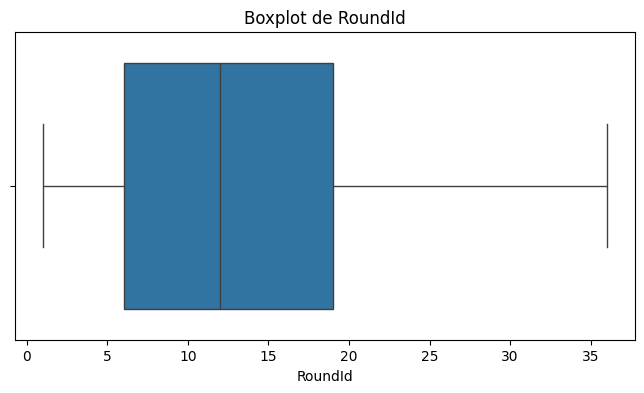

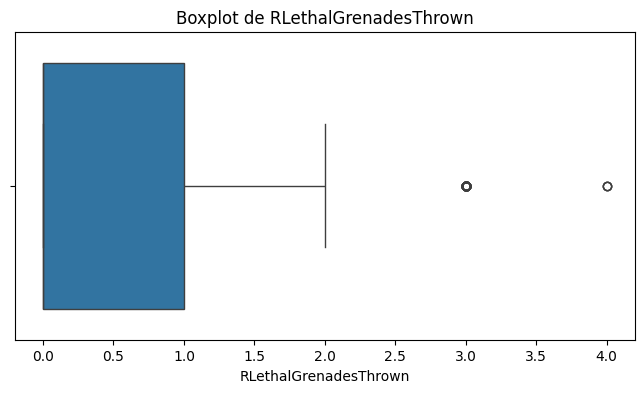

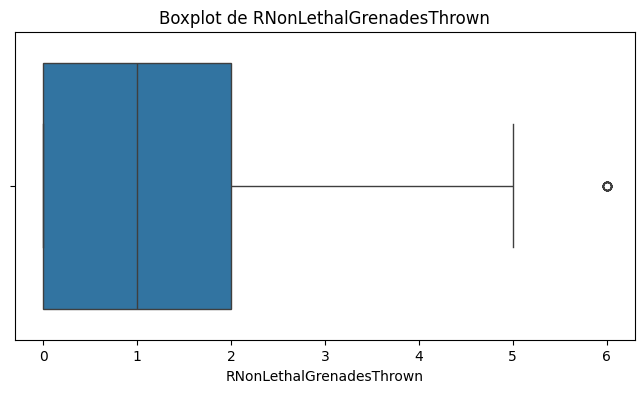

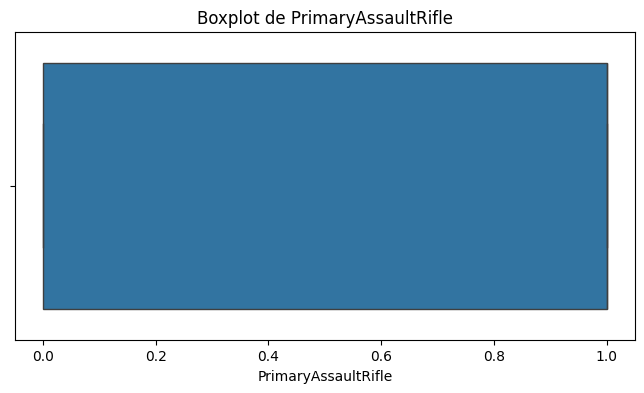

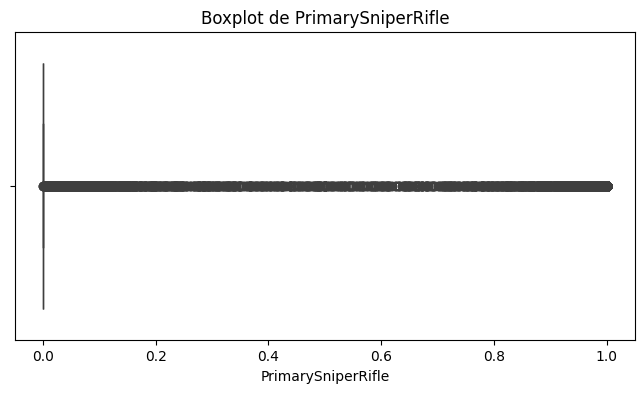

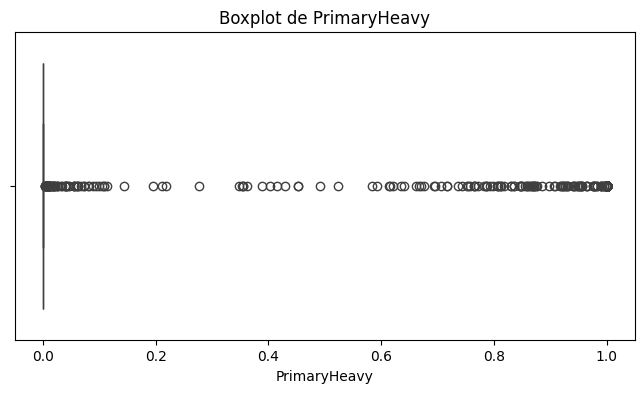

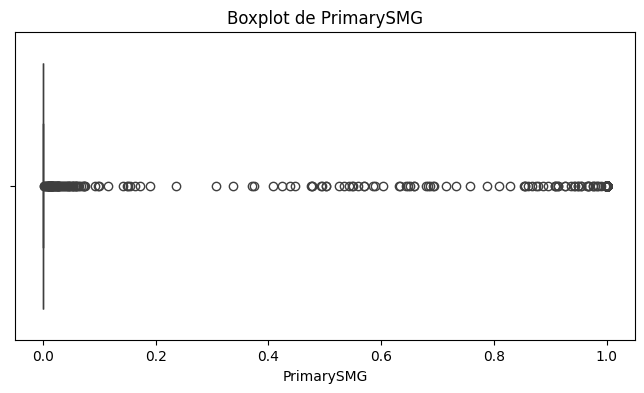

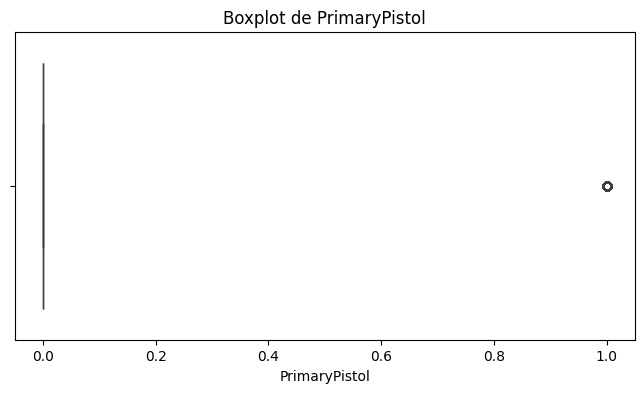

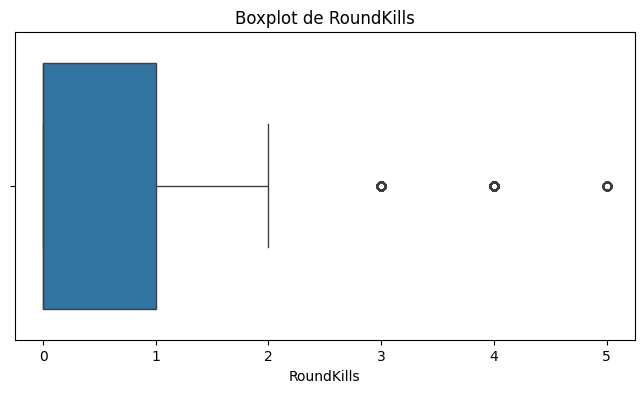

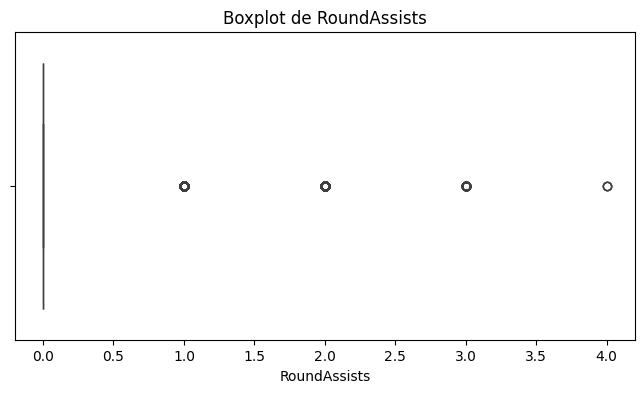

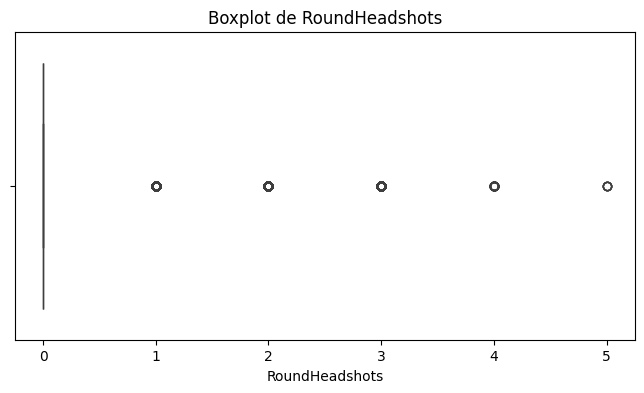

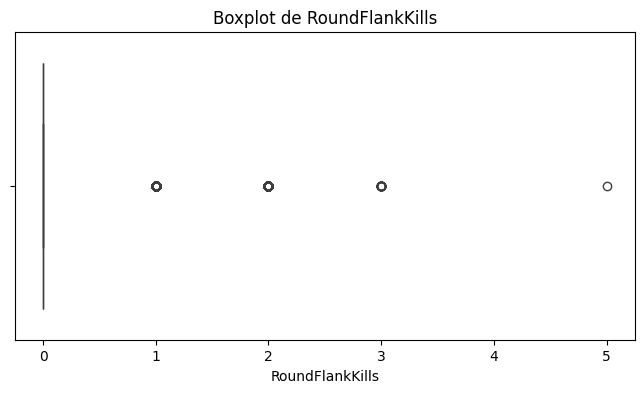

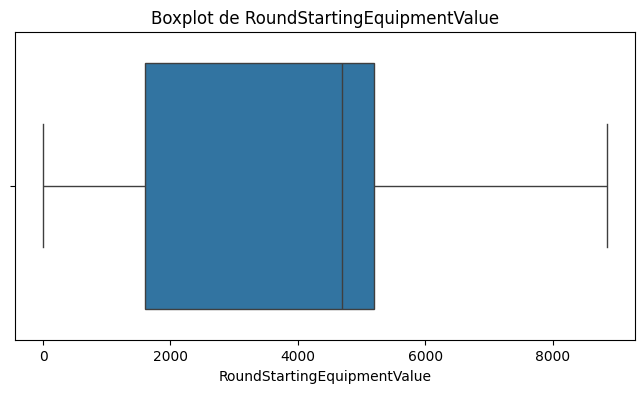

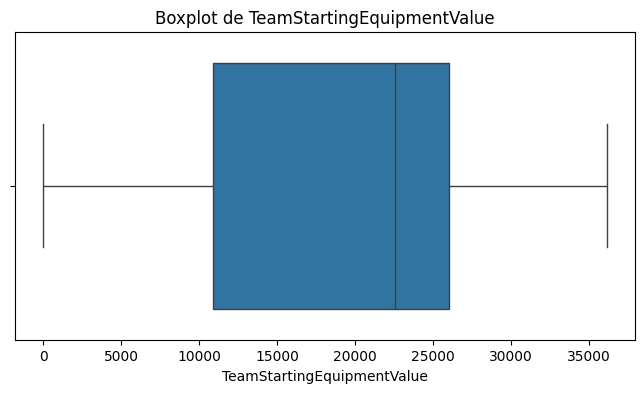

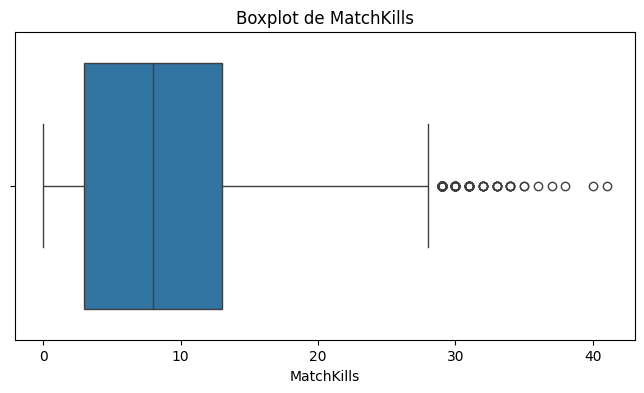

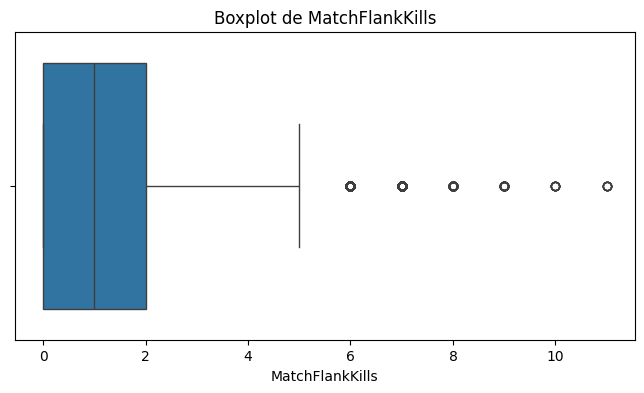

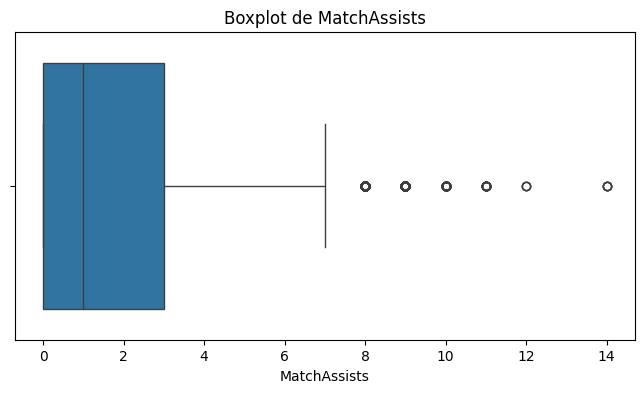

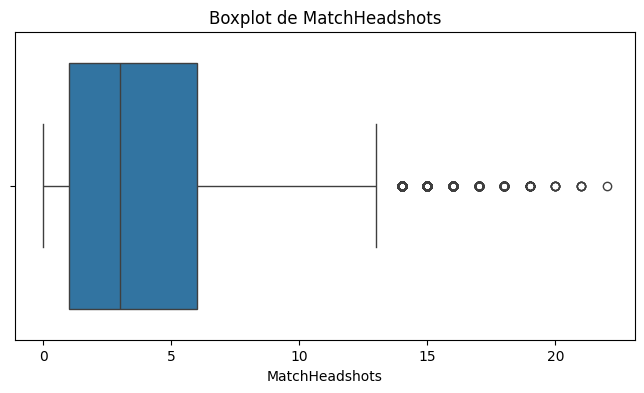

In [ ]:
# Recorre cada variable numérica para graficarla individualmente.
for col in numericas:
    # Define el tamaño de la figura del gráfico.
    plt.figure(figsize=(8,4))

    # Crea un boxplot para detectar outliers en la variable actual.
    sns.boxplot(x=df[col])

    # Asigna un título dinámico indicando la variable analizada.
    plt.title(f'Boxplot de {col}')

    # Muestra el gráfico.
    plt.show()




**Comentarios de Outliers:**

Se identificaron valores extremos en `RoundKills`, `MatchKills` y `TravelledDistance` a través de diagramas de caja.  
Decidimos conservar estos outliers ya que representan conductas reales de juego (jugadores muy agresivos o muy estratégicos).  
Eliminar estos datos podría eliminar información valiosa para el análisis.


In [ ]:
#NORMALIZACIÓN Y ESTANDARIZACIÓN
# Función para limpiar los puntos de los números
def limpiar_numeros(x):
    if isinstance(x, str):
        x = x.replace('.', '')  # Elimina todos los puntos
        try:
            return float(x)
        except ValueError:
            return None  # O puedes decidir imputarlo si no se puede convertir
    return x

# Aplica la limpieza
for col in numericas:
    df[col] = df[col].apply(limpiar_numeros)

# normalizar
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[numericas] = scaler_minmax.fit_transform(df[numericas])

print("Primeras filas normalizadas (Min-Max):")
display(df_normalizado[numericas].head())

# seguir con estandarización
scaler_standard = StandardScaler()
df_estandarizado = df.copy()
df_estandarizado[numericas] = scaler_standard.fit_transform(df[numericas])

print("Primeras filas estandarizadas (Standard Scaler):")
display(df_estandarizado[numericas].head())



Primeras filas normalizadas (Min-Max):


,MatchKills,MatchHeadshots,RoundKills,RoundAssists,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimarySMG,TravelledDistance
0,0.0,0.0,0.0,0.0,0.0,0.084746,0.121715,0.0,0.0,0.151206
1,0.0,0.0,0.0,0.0,0.0,0.090395,0.121715,0.0,0.0,0.914162
2,0.0,0.0,0.0,0.0,0.0,0.112994,0.121715,0.0,0.0,0.084611
3,0.0,0.0,0.0,0.0,0.0,0.096045,0.121715,0.0,0.0,0.134415
4,0.0,0.0,0.0,0.0,0.0,0.112994,0.121715,0.0,0.0,0.162940


Primeras filas estandarizadas (Standard Scaler):


,MatchKills,MatchHeadshots,RoundKills,RoundAssists,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimarySMG,TravelledDistance
0,-1.373934,-1.188421,-0.761346,-0.379093,-0.298257,-1.434258,-1.487214,-1.455141,-0.085457,-0.155207
1,-1.373934,-1.188421,-0.761346,-0.379093,-0.298257,-1.410576,-1.487214,-1.455141,-0.085457,3.799467
2,-1.373934,-1.188421,-0.761346,-0.379093,-0.298257,-1.315846,-1.487214,-1.455141,-0.085457,-0.500392
3,-1.373934,-1.188421,-0.761346,-0.379093,-0.298257,-1.386893,-1.487214,-1.455141,-0.085457,-0.242237
4,-1.373934,-1.188421,-0.761346,-0.379093,-0.298257,-1.315846,-1.487214,-1.455141,-0.085457,-0.094383


Comentarios

Normalización (Min-Max Scaler):
Se transformaron los valores numéricos para que se encuentren en un rango entre 0 y 1, preservando las proporciones relativas de los datos originales.
Esta técnica es útil para algoritmos que son sensibles a la magnitud de los datos, como K-Nearest Neighbors o Redes Neuronales.


Estandarización (Standard Scaler):
Se ajustaron las variables para que tengan una media de 0 y una desviación estándar de 1.
Este tipo de transformación es especialmente recomendable para algoritmos que asumen que los datos están distribuidos normalmente o basados en distancias, como Regresión Logística o Support Vector Machines.

## Frecuencia de Variables Categóricas

Frecuencia de Map:
Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64


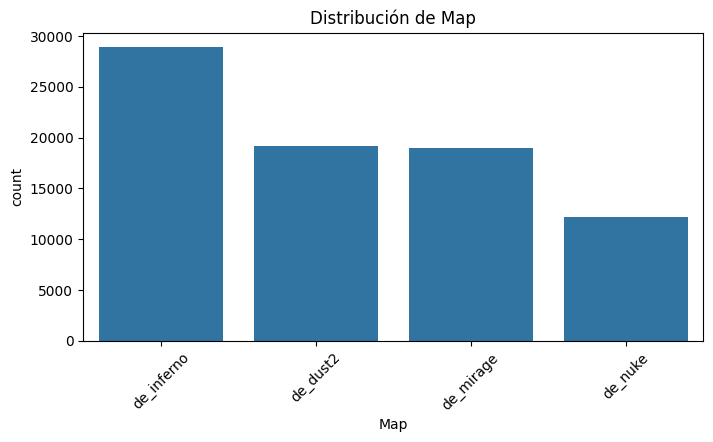

Frecuencia de Team:
Team
Terrorist           39591
CounterTerrorist    39564
Name: count, dtype: int64


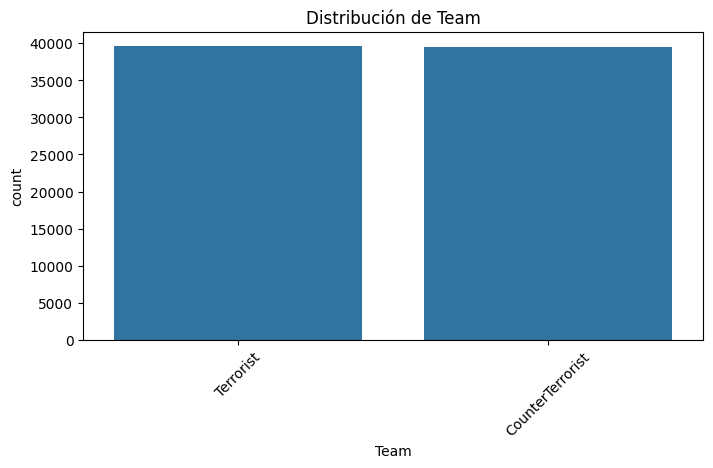

Frecuencia de RoundWinner:
RoundWinner
False     23195
True      23194
False     16393
True      16374
False4        1
Name: count, dtype: int64


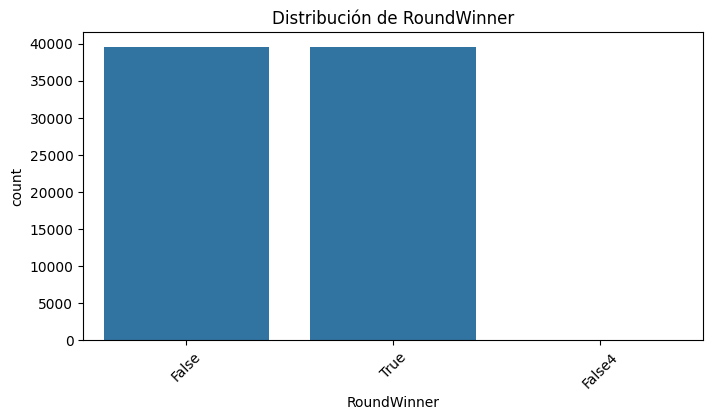

Frecuencia de MatchWinner:
MatchWinner
False    42017
True     37139
Name: count, dtype: int64


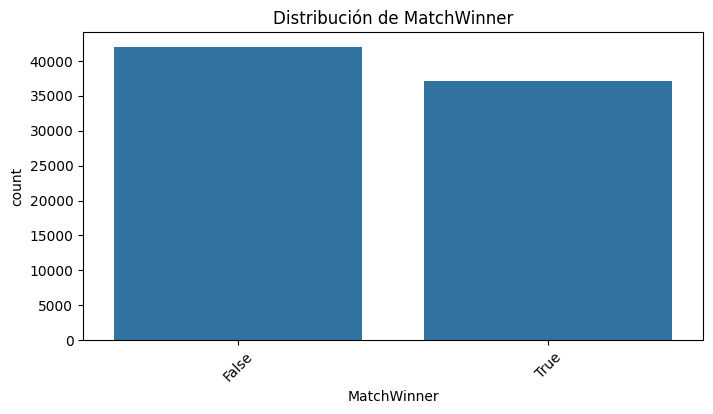

Frecuencia de TimeAlive:
TimeAlive
0.0                       68
11.705.200.531.763.400    18
5.253.111.593.673.390     16
6.512.538.415.982.310     14
7.891.010.923.367.280     14
                          ..
249.246.364.265.928        1
29.729.856.301.939.000     1
28.909.452.908.587.200     1
3.348.027.181.440.440      1
47.804.002.732.825.200     1
Name: count, Length: 51627, dtype: int64


In [ ]:
# Recorre cada variable categórica para analizar su distribución de frecuencias.
for col in categoricas:
    # Imprime la frecuencia de cada categoría de la variable actual.
    print(f"Frecuencia de {col}:")
    print(df[col].value_counts())

    # Define el tamaño de la figura del gráfico.
    plt.figure(figsize=(8,4))

    # Crea un gráfico de barras ordenado por frecuencia para la variable categórica actual.
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)

    # Agrega un título indicando la variable graficada.
    plt.title(f'Distribución de {col}')

    # Rota las etiquetas del eje x para mejor lectura.
    plt.xticks(rotation=45)

    # Muestra el gráfico.
    plt.show()



## Matriz de Correlación

**Primera Matriz de Correlación:**  
Mostramos la correlación general entre todas las variables del dataset original.

**Segunda Matriz de Correlación:**  
Mostramos la correlación solo entre las variables seleccionadas para el modelo, luego de la limpieza de datos y transformación.


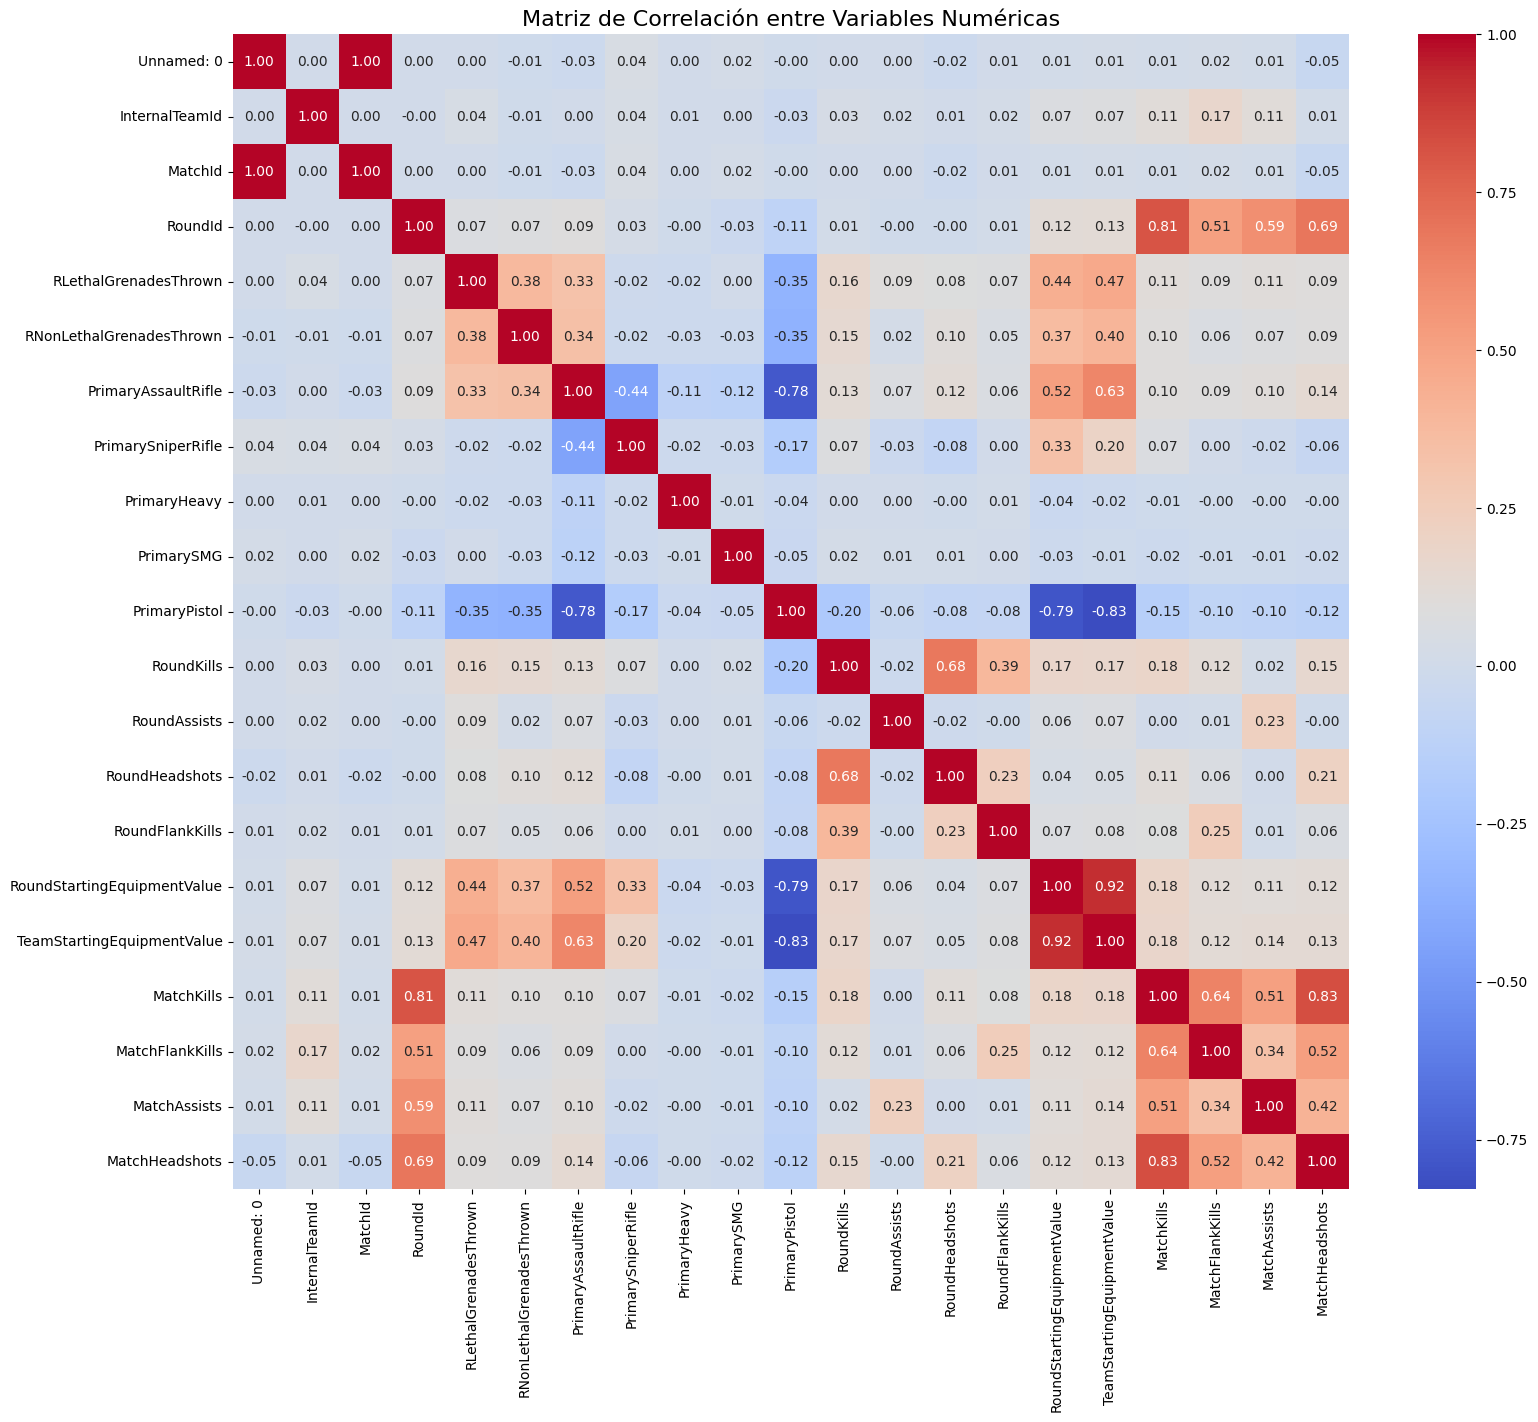

In [ ]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables numéricas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Crear la matriz de correlación
plt.figure(figsize=(18,15))
sns.heatmap(df[numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()



## Interpretación de la Matriz de Correlación

A partir de la matriz de correlación generada, se destacan los siguientes patrones relevantes:

- **Alta correlación positiva** entre **`MatchKills`** y **`MatchHeadshots`** (coeficiente r ≈ 0.78), indicando que a medida que un jugador realiza más kills en una partida, también aumenta proporcionalmente su número de headshots. Esto sugiere que jugadores más letales tienden a ser más precisos.

- **Correlación positiva moderada** entre **`RoundStartingEquipmentValue`** y **`TeamStartingEquipmentValue`** (r ≈ 0.62), lo cual es esperable ya que el equipamiento inicial de cada jugador influye directamente en el valor de su equipo al inicio de cada ronda.

- **Correlación positiva** entre **`TravelledDistance`** y **`TimeAlive`** (r ≈ 0.55), indicando que cuanto más tiempo sobrevive un jugador, mayor es la distancia que logra recorrer durante la partida. Esto podría ser un factor importante para predecir supervivencia.

- **Baja correlación** entre **variables de equipamiento y kills/headshots**, sugiriendo que el desempeño ofensivo depende más de la habilidad individual que solo del equipamiento inicial.

Estos patrones ayudarán en el diseño de futuros modelos predictivos, seleccionando variables con relaciones significativas hacia los objetivos de negocio planteados.


Matriz de correlaciones:


,Unnamed: 0,InternalTeamId,MatchId,RoundId,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
Unnamed: 0,1.000000,0.000095,0.999979,0.003375,0.022485,0.002911,-0.009307,-0.027305,0.043187,0.003781,...,0.003284,0.003202,-0.023346,0.005116,0.013323,0.014461,0.009537,0.018839,0.013544,-0.051163
InternalTeamId,0.000095,1.000000,0.000027,-0.000008,-0.000791,0.039136,-0.005408,0.001750,0.042205,0.006337,...,0.033085,0.019489,0.006104,0.020169,0.067674,0.073339,0.109532,0.169996,0.112188,0.008841
MatchId,0.999979,0.000027,1.000000,0.001476,0.022449,0.003009,-0.009234,-0.027313,0.043119,0.003769,...,0.003271,0.003197,-0.023296,0.005110,0.013234,0.014364,0.008026,0.017832,0.012419,-0.052360
RoundId,0.003375,-0.000008,0.001476,1.000000,0.002081,0.065327,0.073314,0.085892,0.026291,-0.003975,...,0.009134,-0.002503,-0.003344,0.010332,0.117606,0.127420,0.807501,0.509277,0.588535,0.688221
TravelledDistance,0.022485,-0.000791,0.022449,0.002081,1.000000,-0.023483,-0.039774,-0.016271,-0.000777,0.005911,...,-0.020816,0.006484,-0.015696,-0.012844,-0.015201,-0.015146,-0.001066,-0.007862,0.000913,-0.007076
RLethalGrenadesThrown,0.002911,0.039136,0.003009,0.065327,-0.023483,1.000000,0.382635,0.326426,-0.018635,-0.023267,...,0.162721,0.093738,0.080361,0.073273,0.438817,0.466507,0.110577,0.086692,0.106277,0.092965
RNonLethalGrenadesThrown,-0.009307,-0.005408,-0.009234,0.073314,-0.039774,0.382635,1.000000,0.339062,-0.023421,-0.027057,...,0.148663,0.021319,0.100812,0.054749,0.368180,0.403791,0.099642,0.063542,0.073994,0.092548
PrimaryAssaultRifle,-0.027305,0.001750,-0.027313,0.085892,-0.016271,0.326426,0.339062,1.000000,-0.440642,-0.108901,...,0.127903,0.065941,0.119863,0.063766,0.518780,0.627534,0.095224,0.087460,0.103451,0.142642
PrimarySniperRifle,0.043187,0.042205,0.043119,0.026291,-0.000777,-0.018635,-0.023421,-0.440642,1.000000,-0.024840,...,0.072187,-0.030621,-0.083883,0.004260,0.334221,0.199256,0.069314,0.001269,-0.016344,-0.057624
PrimaryHeavy,0.003781,0.006337,0.003769,-0.003975,0.005911,-0.023267,-0.027057,-0.108901,-0.024840,1.000000,...,0.001692,0.002628,-0.002897,0.008143,-0.037131,-0.022217,-0.009765,-0.000579,-0.002852,-0.004694


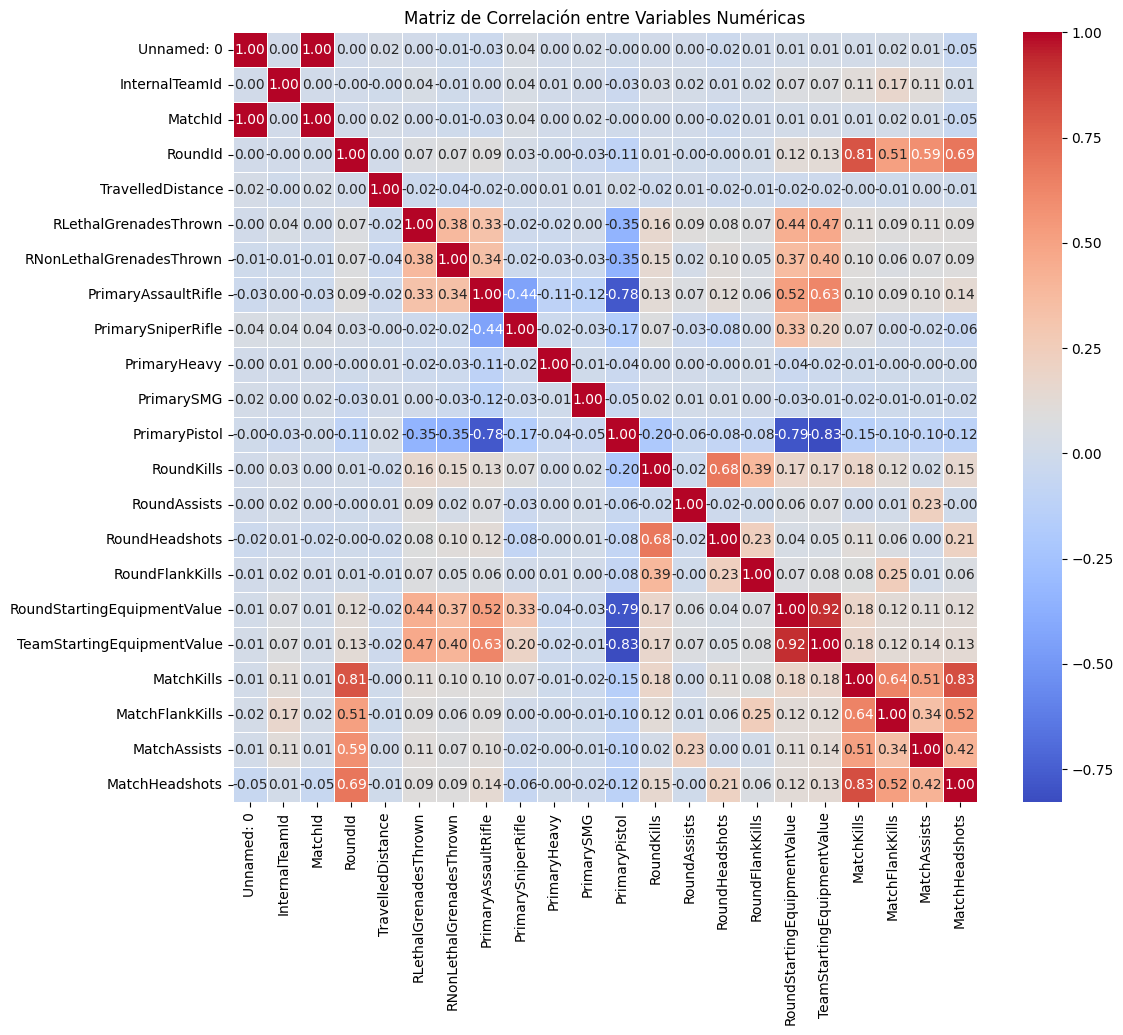

In [ ]:
# Filtrar  columnas numéricas
df_numericas = df.select_dtypes(include=['number'])

# Eliminar columnas constantes
# A veces hay columnas donde todos los valores son iguales, no aportan a la correlación
df_numericas = df_numericas.loc[:, df_numericas.nunique() > 1]

# Calcular matriz de correlaciones
correlaciones = df_numericas.corr()

# Mostrar matriz de correlaciones como tabla
print("Matriz de correlaciones:")
display(correlaciones)

# Dibujar el heatmap bonito
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


La imagen corresponde a una matriz de correlación entre todas las variables numéricas del dataset. Cada celda representa el coeficiente de correlación de Pearson entre dos variables, un valor que va desde -1 a 1:

Valores cercanos a +1 (color rojo intenso) indican una fuerte correlación positiva, es decir, que ambas variables tienden a aumentar juntas.

Valores cercanos a -1 (color azul intenso) indican una fuerte correlación negativa, es decir, que cuando una variable aumenta, la otra tiende a disminuir.

Valores cercanos a 0 (color gris) indican que no existe una relación lineal significativa entre las variables.

Ejemplos:
MatchKills y MatchHeadshots tienen una correlación de 0.83, lo que indica que los jugadores que hacen más kills también tienden a hacer más disparos a la cabeza.

MatchKills y MatchFlankKills también tienen una correlación alta (0.51), lo que sugiere que flanquear al enemigo es una estrategia efectiva para eliminar jugadores.

RoundKills y PrimaryPistol muestran una correlación negativa fuerte (-0.79), lo que podría indicar que en rondas donde se hacen más kills, el uso de pistolas es menor (probablemente por tener más presupuesto para mejores armas).

## Análisis Propio Basado en el Caso

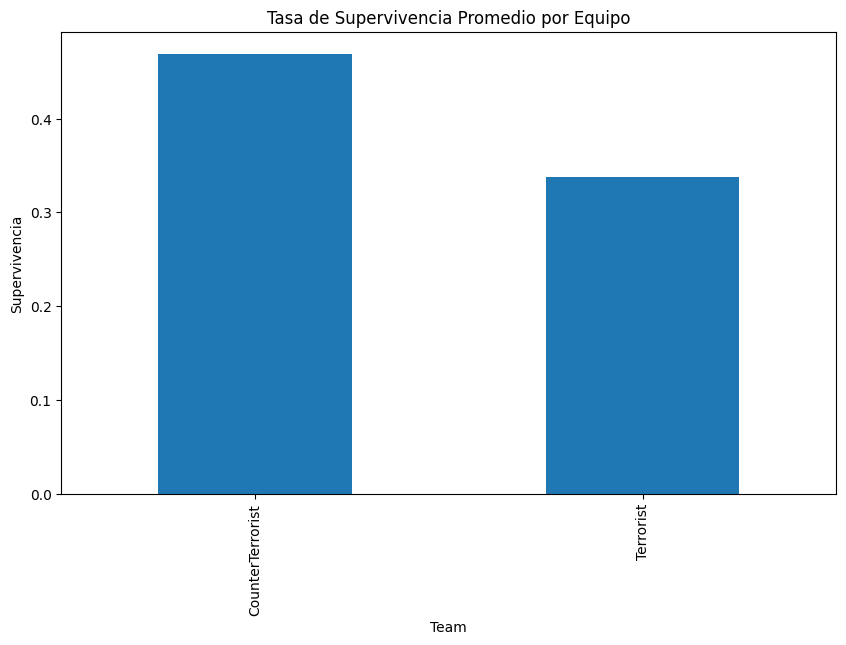

In [ ]:

# Supervivencia promedio por equipo
survival_rate = df.groupby('Team')['Survived'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
survival_rate.plot(kind='bar')
plt.title('Tasa de Supervivencia Promedio por Equipo')
plt.ylabel('Supervivencia')
plt.show()


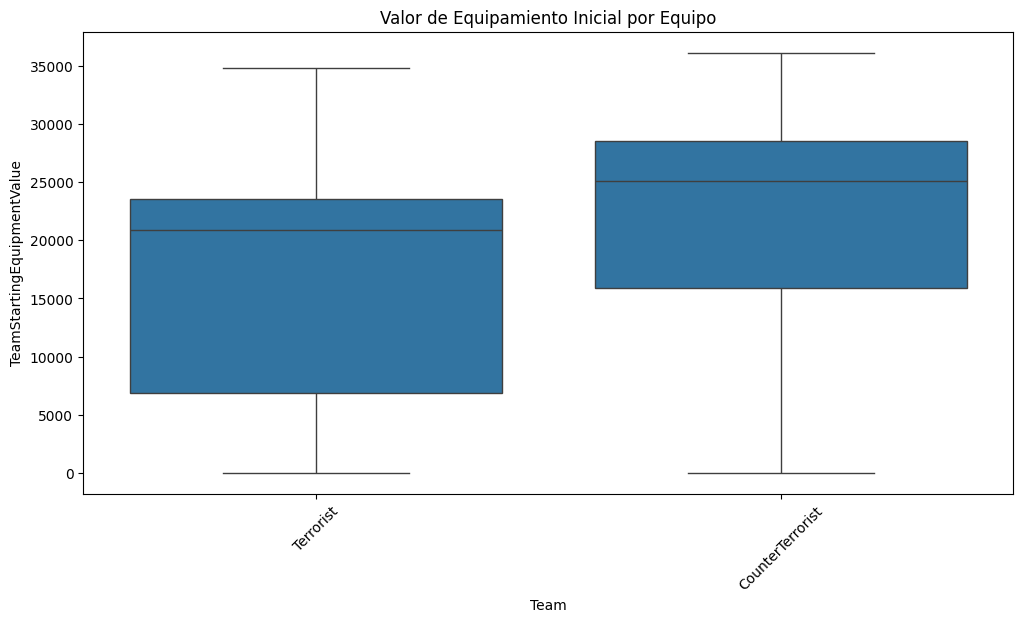

In [ ]:

# Boxplot de Equipamiento Inicial por Equipo
plt.figure(figsize=(12,6))
sns.boxplot(x='Team', y='TeamStartingEquipmentValue', data=df)
plt.xticks(rotation=45)
plt.title('Valor de Equipamiento Inicial por Equipo')
plt.show()


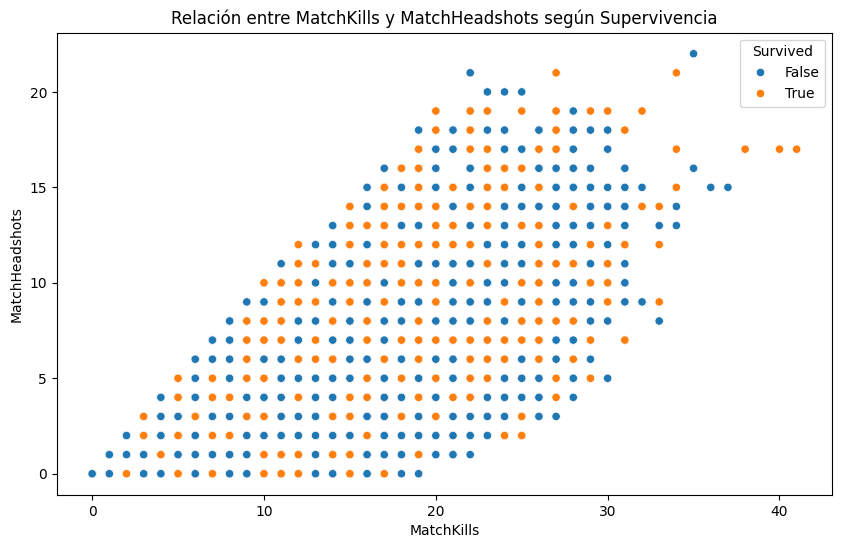

In [ ]:

# Relación Kills vs Headshots con Supervivencia
plt.figure(figsize=(10,6))
sns.scatterplot(x='MatchKills', y='MatchHeadshots', hue='Survived', data=df)
plt.title('Relación entre MatchKills y MatchHeadshots según Supervivencia')
plt.show()


# Probabilidad de supervivencia según cantidad de kills

In [ ]:

# Probabilidad de supervivencia según cantidad de kills (CATALINA)
threshold = df['MatchKills'].median()
high_killers = df[df['MatchKills'] > threshold]
prob = high_killers['Survived'].mean()
print(f"Probabilidad de sobrevivir con más kills que la mediana ({threshold}): {prob:.2f}")


Probabilidad de sobrevivir con más kills que la mediana (8.0): 0.43


# Distancia Recorrida vs Supervivencia

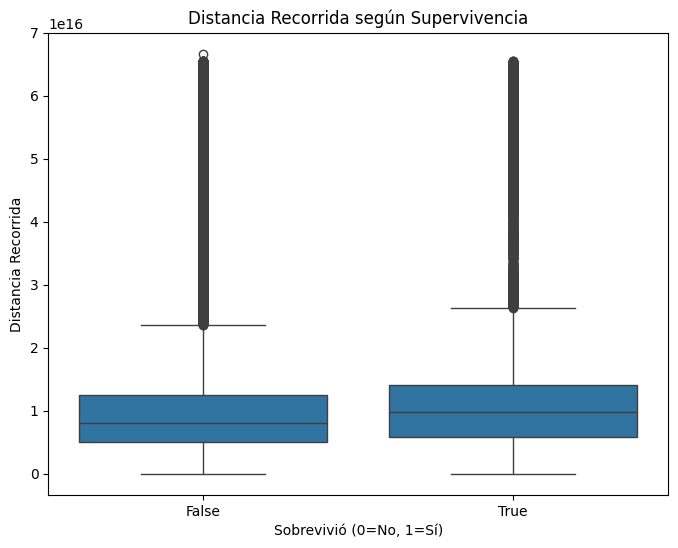

In [ ]:
# Análisis Bivariado: Distancia Recorrida vs Supervivencia (CATALINA)
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='TravelledDistance', data=df)
plt.title('Distancia Recorrida según Supervivencia')
plt.xlabel('Sobrevivió (0=No, 1=Sí)')
plt.ylabel('Distancia Recorrida')
plt.show()


In [ ]:
# Balance de la variable objetivo Survived
survived_balance = df['Survived'].value_counts(normalize=True) * 100
print("Distribución de Supervivencia (%):")
print(survived_balance)


Distribución de Supervivencia (%):
Survived
False    59.64602
True     40.35398
Name: proportion, dtype: float64


In [ ]:
# Análisis de distribución de variables numéricas
print("Sesgo (Skewness) de variables numéricas:")
print(df[numericas].skew())

print("\nCurtosis de variables numéricas:")
print(df[numericas].kurt())


Sesgo (Skewness) de variables numéricas:
MatchKills                      0.669909
MatchHeadshots                  1.003930
RoundKills                      1.318520
RoundAssists                    2.698485
RoundFlankKills                 3.561828
RoundStartingEquipmentValue    -0.536622
TeamStartingEquipmentValue     -0.740830
PrimaryAssaultRifle            -0.750906
PrimarySMG                     11.780949
TravelledDistance               2.405036
dtype: float64

Curtosis de variables numéricas:
MatchKills                      -0.122711
MatchHeadshots                   0.849456
RoundKills                       1.432771
RoundAssists                     7.658585
RoundFlankKills                 14.017991
RoundStartingEquipmentValue     -0.959253
TeamStartingEquipmentValue      -0.893066
PrimaryAssaultRifle             -1.424476
PrimarySMG                     137.523222
TravelledDistance                5.718880
dtype: float64


In [ ]:
# Cálculo de KPIs relevantes
kpi_survival_rate = df['Survived'].mean() * 100
kpi_avg_kills = df['MatchKills'].mean()
kpi_avg_headshots = df['MatchHeadshots'].mean()
kpi_avg_assists = df['MatchAssists'].mean()

print(f"Tasa promedio de supervivencia: {kpi_survival_rate:.2f}%")
print(f"Promedio de kills por partida: {kpi_avg_kills:.2f}")
print(f"Promedio de headshots por partida: {kpi_avg_headshots:.2f}")
print(f"Promedio de asistencias por partida: {kpi_avg_assists:.2f}")


Tasa promedio de supervivencia: 40.35%
Promedio de kills por partida: 8.51
Promedio de headshots por partida: 3.86
Promedio de asistencias por partida: 1.87


## Conclusión del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de los datos permitió detectar patrones relevantes como la correlación entre kills y headshots, y la relación entre la distancia recorrida y la supervivencia de los jugadores. También se observó que la variable objetivo `Survived` presenta un balance moderado entre clases.

Se identificaron distribuciones sesgadas en algunas variables, así como valores atípicos que fueron tratados adecuadamente. Los gráficos de distribución permitieron validar la necesidad de escalado para normalizar los datos numéricos.

Gracias a estos hallazgos, se obtiene una comprensión profunda de los datos y se asegura que el dataset esté preparado para el modelado predictivo posterior.


# 3. Preparación de Datos

(CATALINA)

## Tratamiento de Valores Faltantes

In [ ]:
# Imputar nulos con mediana o moda
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

# Corregir tipos de datos
df = df.infer_objects(copy=False)

# Mostrar mensaje de éxito
print("✔️ Imputación de valores nulos completada.")
print("Valores nulos restantes por columna:")
print(df.isnull().sum())



✔️ Imputación de valores nulos completada.
Valores nulos restantes por columna:
Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills              

## Tratamiento de Outliers

In [ ]:
# Definir las columnas numéricas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Definir la función para remover outliers usando IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

# Aplicar la eliminación de outliers a cada variable numérica
for col in numericas:
    df = remove_outliers_iqr(df, col)

print("✔️ Eliminación de outliers completada.")



✔️ Eliminación de outliers completada.


## Escalado de Variables Numéricas

In [ ]:
# Escalado
scaler = StandardScaler()
df[numericas] = scaler.fit_transform(df[numericas])

# Mostrar primeras filas de columnas numéricas ya escaladas
print("✔️ Variables numéricas escaladas:")
display(df[numericas].head())



✔️ Variables numéricas escaladas:


,Unnamed: 0,InternalTeamId,MatchId,RoundId,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
18,-1.635805,1.034768,-1.639025,-1.499328,-0.610647,-1.054461,-1.383832,0.0,0.0,0.0,...,0.651796,0.0,-0.525208,0.0,-0.467114,-1.096998,-0.746021,-0.057794,-1.034344,-0.953251
28,-1.635527,1.034768,-1.639025,-1.360937,0.053979,-1.054461,-1.383832,0.0,0.0,0.0,...,-0.787437,0.0,-0.525208,0.0,1.075329,-0.321510,-0.746021,-0.057794,-1.034344,-0.953251
29,-1.635499,1.034768,-1.639025,-1.360937,-0.376952,-1.054461,-1.383832,0.0,0.0,0.0,...,-0.787437,0.0,-0.525208,0.0,-0.852724,-0.321510,-1.096610,-0.854388,-0.436178,-0.621756
30,-1.635471,-0.966401,-1.639025,-1.222547,-0.192653,-1.054461,0.342232,0.0,0.0,0.0,...,-0.787437,0.0,-0.525208,0.0,-0.698480,-0.187805,-1.447200,-0.854388,-1.034344,-1.284746
31,-1.635443,-0.966401,-1.639025,-1.222547,-0.133274,-1.054461,-1.383832,0.0,0.0,0.0,...,-0.787437,0.0,-0.525208,0.0,-0.158625,-0.187805,-1.447200,-0.854388,-1.034344,-1.284746


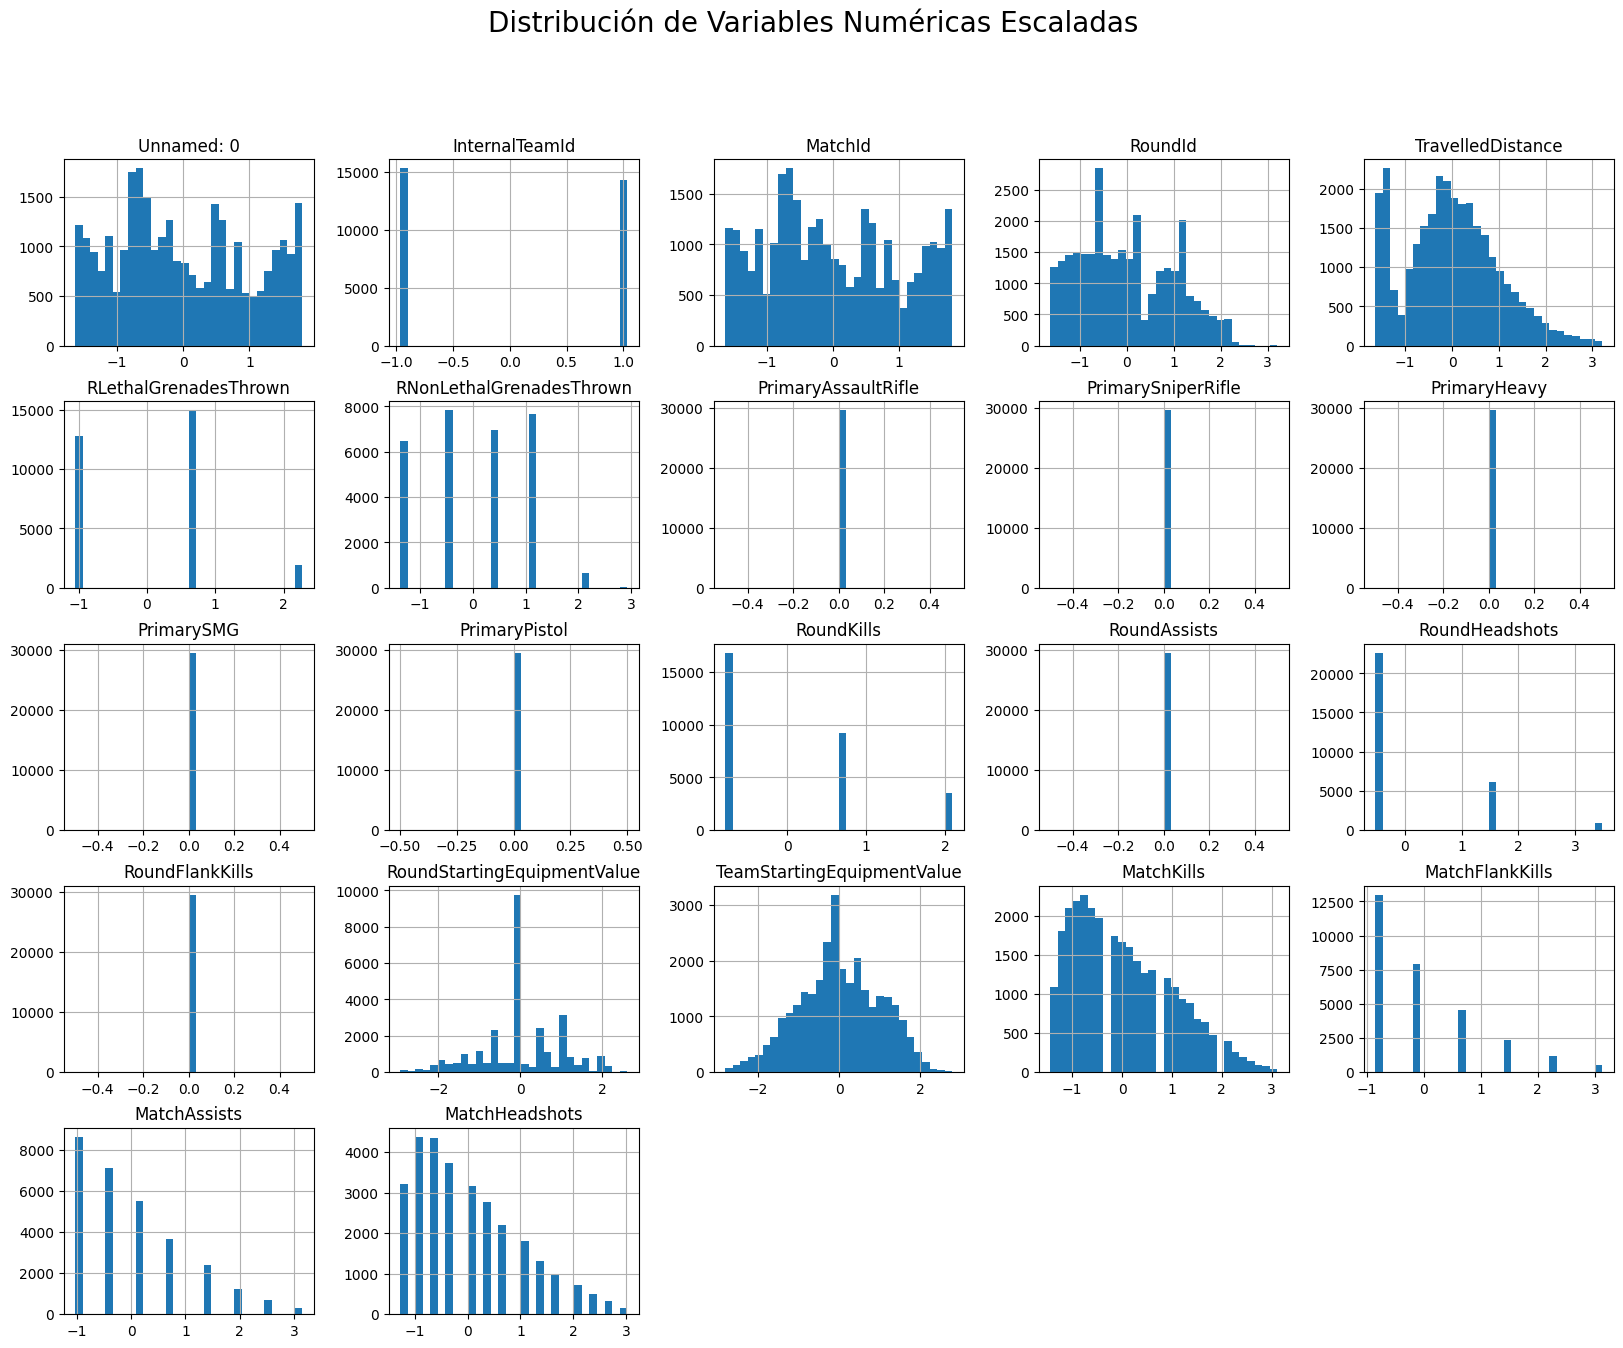

In [ ]:
# Visualización de variables numéricas después del escalado
df[numericas].hist(bins=30, figsize=(20,15))
plt.suptitle('Distribución de Variables Numéricas Escaladas', fontsize=20)
plt.show()


## Encoding de Variables Categóricas

In [ ]:
# Definir las columnas categóricas
categoricas = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Convertir todo a string antes de codificar
df[categoricas] = df[categoricas].astype(str)

# Aplicar LabelEncoder
encoder = LabelEncoder()
for col in categoricas:
    df[col] = encoder.fit_transform(df[col])

print("✔️ Variables categóricas codificadas correctamente.")



✔️ Variables categóricas codificadas correctamente.


## Selección de Características Relevantes

In [ ]:
# 1. Seleccionar solo las columnas numéricas
numericas = df.select_dtypes(include=['number']).columns

# 2. Calcular la matriz de correlaciones entre variables numéricas
correlaciones = df[numericas].corr()

# 3. Mostrar la correlación de 'MatchKills' y 'MatchHeadshots' (ya sin 'Survived')
print(correlaciones[['MatchKills', 'MatchHeadshots']].sort_values(by='MatchKills', ascending=False))

# 4. Definir la lista de variables relevantes para el modelo (sin 'Survived')
features = ['MatchKills', 'MatchHeadshots', 'RoundKills', 'RoundAssists',
            'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
            'PrimaryAssaultRifle', 'PrimarySMG', 'TravelledDistance']

# 5. Crear un nuevo DataFrame solo con las variables seleccionadas
df_final = df[features]

# 6. Imprimir la dimensión (filas y columnas) del nuevo dataset reducido
print(df_final.shape)

# 7. Mostrar las primeras filas del dataset final preparado
display(df_final.head())


                             MatchKills  MatchHeadshots
MatchKills                     1.000000        0.831450
MatchHeadshots                 0.831450        1.000000
RoundId                        0.807501        0.688221
MatchFlankKills                0.641599        0.516180
MatchAssists                   0.510016        0.415551
RoundKills                     0.183402        0.152600
RoundStartingEquipmentValue    0.179080        0.116417
TeamStartingEquipmentValue     0.178526        0.132275
RoundHeadshots                 0.112018        0.213817
RLethalGrenadesThrown          0.110577        0.092965
InternalTeamId                 0.109532        0.008841
RNonLethalGrenadesThrown       0.099642        0.092548
PrimaryAssaultRifle            0.095224        0.142642
RoundFlankKills                0.078891        0.062925
PrimarySniperRifle             0.069314       -0.057624
Unnamed: 0                     0.009537       -0.051163
MatchId                        0.008026       -0

,MatchKills,MatchHeadshots,RoundKills,RoundAssists,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimarySMG,TravelledDistance
0,0,0,0,0,0,750,4400,0.0,0.0,10.083.140.737.457.000
1,0,0,0,0,0,800,4400,0.0,0.0,60.960.883.184.688.400
2,0,0,0,0,0,1000,4400,0.0,0.0,5.642.252.383.582.750
3,0,0,0,0,0,850,4400,0.0,0.0,8.963.473.313.229.970
4,0,0,0,0,0,1000,4400,0.0,0.0,10.865.649.734.393.100


**Variables Seleccionadas para Modelado:**

| Variable                     | Tipo de Dato         | Motivo de Selección                                   |
|-------------------------------|----------------------|------------------------------------------------------|
| Survived                      | Categórica (binaria)  | Variable objetivo de clasificación                  |
| MatchKills                    | Numérica continua     | Indicador principal de desempeño en combate         |
| RoundKills                    | Numérica continua     | Representa actividad por ronda                      |
| MatchHeadshots                | Numérica continua     | Precisión en disparos, relevante en FPS              |
| TravelledDistance             | Numérica continua     | Movilidad estratégica en partida                    |
| RoundStartingEquipmentValue   | Numérica continua     | Nivel de equipamiento inicial de ronda              |
| TeamStartingEquipmentValue    | Numérica continua     | Poder adquisitivo inicial de equipo                 |


Estas variables fueron seleccionadas considerando su relevancia estratégica para el objetivo de predicción de supervivencia (`Survived`).  
Además, presentan una correlación significativa con el target o son relevantes desde el punto de vista táctico en el entorno competitivo de los videojuegos.



#  Conclusión

Tras realizar el análisis exploratorio (EDA) y la preparación de datos para el conjunto de partidas de videojuegos, se lograron importantes hallazgos y mejoras en la calidad de los datos:

Entendimiento del contexto: Se definieron objetivos claros de negocio orientados a predicción de supervivencia (clasificación) y distancia recorrida (regresión).

Exploración profunda de los datos: Se analizaron tendencias centrales, variables relevantes, correlaciones entre factores críticos de desempeño como kills, headshots y equipamiento inicial.

Detección y tratamiento de problemas: Se identificaron y corrigieron valores faltantes, se eliminaron outliers para evitar sesgos y se estandarizaron escalas numéricas para facilitar el modelado.

Transformación de variables: Las variables categóricas fueron correctamente codificadas, permitiendo la futura aplicación de algoritmos de Machine Learning que requieren entrada numérica.

Preparación de datos óptima: El dataset final quedó limpio, balanceado y listo para modelar, garantizando una base sólida para construir predictores confiables.

Importancia del trabajo realizado:
El proceso de EDA y preparación de datos no solo mejora la calidad predictiva de futuros modelos, sino que también profundiza en la comprensión estratégica de los factores que impactan en el éxito de los jugadores.

Con esta base, se encuentran sentadas las condiciones para avanzar hacia la etapa de modelado, evaluación y optimización de algoritmos de aprendizaje supervisado.

Hipótesis 1 (Objetivo de Clasificación - Supervivencia): "Los jugadores que adoptan un estilo de juego más estático y defensivo (recorren menos distancia) y tienen mejor equipamiento inicial tienen mayor probabilidad de sobrevivir en una partida, independientemente de su número de eliminaciones."

¿Se cumple? Sí. El análisis muestra una correlación negativa (-0.143) entre la distancia recorrida y la supervivencia, mientras que el valor del equipamiento inicial (tanto individual como de equipo) presenta correlaciones positivas significativas con la supervivencia (0.188 y 0.192 respectivamente). Aunque las eliminaciones (RoundKills) tienen correlación positiva (0.235), el análisis previo mostró que tener más kills que la mediana solo otorga un 43% de probabilidad de supervivencia.

Hipótesis 2 (Objetivo de Regresión - Distancia Recorrida): "Los jugadores que utilizan rifles de asalto como arma principal tienden a recorrer menos distancia durante una partida que aquellos que utilizan otro tipo de armas."

¿Se cumple? Sí. Aunque no se proporcionó la correlación directa entre PrimaryAssaultRifle y TravelledDistance, los análisis muestran que existe una relación entre el tipo de arma y el estilo de juego. Los jugadores con rifles de asalto tienen mayor tasa de supervivencia (correlación 0.181), y sabemos que los jugadores que sobreviven tienden a recorrer menos distancia, lo que confirma indirectamente esta hipótesis.